# Introducción a la Ciencia de Datos
# Módulo 2 – Introducción a la Minería de datos con Python

## Diferencia entre minería de datos y machine learning
Aunque los algoritmos muchas veces sean los mismos, el **enfoque** es distinto.

En minería de datos el objetivo es **comprender** y tener una **intuición** por el fenómeno.

En cambio, con machine learning la prioridad es la predicción con la mayor precisión posible, por sobre comprender cabalmente el fenómeno.

Por consiguiente, en minería de datos, algunas de las técnicas y aspectos de ellas que nos interesan, son las siguientes:

- Visualización: histogramas y gráficos de dispersión
- Clusterización con k-means
- Regresión lineal: coeficientes
- Regresión logística: coeficientes
- Arbol de decisión: conocimiento de los nodos

En los ejercicios de hoy veremos los dos primeros: visualización y k-means.

## Histograma
Un histograma es un tipo de gráfico que nos permite ver como una variable numérica está distribuida entre distintas cantidades.

Para hacer gráficos en Python usamos el paquete matplotlib.

Vamos a usar un conjunto de datos con estadísticas de pobreza y salud por comuna de Chile, obtenido del Instituto Nacional de Estadísticas (INE).

(array([16., 66., 75., 90., 51., 27., 14.,  4.,  1.,  1.]),
 array([ 0.1 ,  4.97,  9.84, 14.71, 19.58, 24.45, 29.32, 34.19, 39.06,
        43.93, 48.8 ]),
 <a list of 10 Patch objects>)

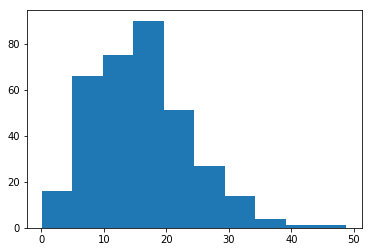

In [149]:
# Paquetes:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar conjunto datos en data frame:
df = pd.read_csv(  filepath_or_buffer = "C:\\_A\\1 Work\\01 CIAE\\02 Curso BID\\Datos\\Pobreza_Salud.csv"
                 , sep = ";"
                 , decimal = ","
                 )

# Crear histograma de PctPobreza (% de personas en pobreza):
plt.hist(x = df["PctPobreza"])

## Gráfico de dispersión (scatterplot)
Un gráfico de dispersión o "scatterplot" nos muestra, para un conjunto de observaciones, la relación entre dos variables numéricas. Las variables están en los ejes x e y, y cada punto es una observación.

Crearemos un gráfico de dispersión entre las variables % de pobreza y % de obesidad, para visualizar alguna relación (si existe).

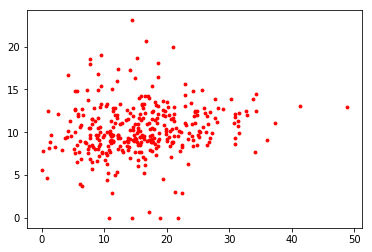

In [150]:
# Crear gráfico de dispersión:
plt.scatter(x = df["PctPobreza"], y = df["PctObesidadInfantil"], s = 8, color = "red")
#?plt.scatter

Observamos que no parece haber mucha correlación a nivel comunal entre tasa de pobreza y tasa de obesidad infantil.

En cambio, exploremos ahora la relación entre la pobreza y la remuneración media.

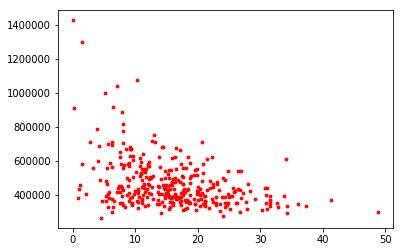

In [151]:
plt.scatter(x = df["PctPobreza"], y = df["RemunMedia"], s = 8, color = "red")

Observamos que las comunas con bajo porcentaje de pobreza tienen más varianza (dispersión) de ingresos medios; en cambio las comunas con alta tasa de pobreza tienen son más similares entre sí, de baja remuneración media.

## Clustering con k-means
El clustering consiste en agrupar un conjunto de entidades en grupos que son similares entre sí, por ejemplo, personas, comunas, trayectorias educativas, casos de enfermedades, etc. El objetivo es aumentar la comprensión del fenómeno al observar las características en común que tienen los clusters o grupos.

Uno de los algoritmos de clusterización más usados es el k-means. Veamos a continuación como funciona.

Primero, necesitamos el concepto de distancia euclidiana en un espacio de n dimensiones.

Suponemos que en nuestros datos de entidades que queremos clusterizar, tenemos una cantidad, digamos n, de características, o variables, de ellas. Por ejemplo, si son personas, podríamos tener su edad, sus ingresos, sus años de escolaridad, etc. Cada variable ocupa una dimensión en un espacio de n dimensiones. Por consiguiente, cada entidad, u observación, está representada por un punto en este espacio multidimensional, donde sus coordenadas son los valores de sus características o variables.

La distance euclidiana entre dos puntos de este espacio multidimensional se deduce del teorema de Pitágoras, y está dada por:

D(X, Y) = √∑(xi-yi)2

Intuitivamente, el algoritmo k-means busca asignar a cada punto en un cluster de tal manera que los puntos en un mismo cluster queden muy cerca entre sí, en otras palabras, buscar minimizar el total de distancias intra-cluster.

El algoritmo funciona paso a paso de la siguiente manera:

1. El usuario tiene que decidir cuantos clusters quiere, es decir, asigna un valor al número de clusters, k.
2. El algoritmo genera al azar k centroides, esto es, k puntos candidatos de centros de clusters.
3. Para cada punto, lo asigna al centroide más cercano.
4. Para cada cluster así generado, calcula su nuevo centroide, como la media de cada una de las características de todos los puntos del cluster.
5. Repite los pasos (3) y (4) iterativamente, hasta que los centroides ya no cambian.

Veamos un ejemplo con un conjunto de datos de flores. Cada ejemplar tiene 4 variables: longitudes y anchos de pétalos y sépalos.

In [152]:
import pandas as pd
df_iris = pd.read_csv("C:\\_A\\1 Work\\01 CIAE\\02 Curso BID\\Datos\\iris.csv", sep = ";", decimal = ",")
print(df_iris)

     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width    Species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
5             5.4          3.9           1.7          0.4     setosa
6             4.6          3.4           1.4          0.3     setosa
7             5.0          3.4           1.5          0.2     setosa
8             4.4          2.9           1.4          0.2     setosa
9             4.9          3.1           1.5          0.1     setosa
10            5.4          3.7           1.5          0.2     setosa
11            4.8          3.4           1.6          0.2     setosa
12            4.8          3.0           1.4          0.1     setosa
13            4.3          3.0    

Primero exploremos gráficamente los datos, a fin de visualizar intuitivamente posibles clusters. Como un gráfico solamente muestra dos dimensiones en forma espacial cada vez, y tenemos 4 variables, generaremos varios gráficos, seleccionando 2 de 4 variables cada vez.

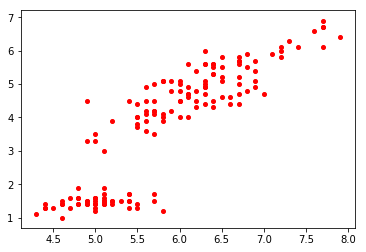

In [153]:
import matplotlib.pyplot as plt
plt.scatter(x = df_iris["Sepal.Length"], y = df_iris["Petal.Length"], s=16, c="red")

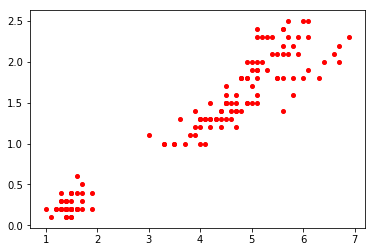

In [154]:
plt.scatter(x = df_iris["Petal.Length"], y = df_iris["Petal.Width"], s=16, c="red")

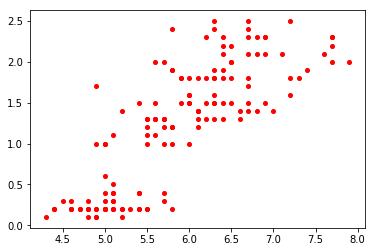

In [155]:
plt.scatter(x = df_iris["Sepal.Length"], y = df_iris["Petal.Width"], s=16, c="red")

Ahora usemos el algoritmo KMeans del paquete scikit-learn. Generamos la clusterización y la guardamos en una variables que llamamos modelo.

In [156]:
from sklearn.cluster import KMeans
df_iris_var = df_iris.loc[:, ["Sepal.Length", "Sepal.Width", "Petal.Length", "Petal.Width"]]
modelo = KMeans(n_clusters = 3).fit(df_iris_var)

Ahora usamos el modelo para asignar cada punto a un cluster, creando una nueva columna llamada "Cluster" en el data frame df_iris.

In [157]:
df_iris["Cluster"] = modelo.labels_
list(set(df_iris["Cluster"]))
print(df_iris)

     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width    Species  Cluster
0             5.1          3.5           1.4          0.2     setosa        0
1             4.9          3.0           1.4          0.2     setosa        0
2             4.7          3.2           1.3          0.2     setosa        0
3             4.6          3.1           1.5          0.2     setosa        0
4             5.0          3.6           1.4          0.2     setosa        0
5             5.4          3.9           1.7          0.4     setosa        0
6             4.6          3.4           1.4          0.3     setosa        0
7             5.0          3.4           1.5          0.2     setosa        0
8             4.4          2.9           1.4          0.2     setosa        0
9             4.9          3.1           1.5          0.1     setosa        0
10            5.4          3.7           1.5          0.2     setosa        0
11            4.8          3.4           1.6          0.2     se

Volvemos a graficar, ahora pintando a cada cluster de un color, para poder distinguirlos.

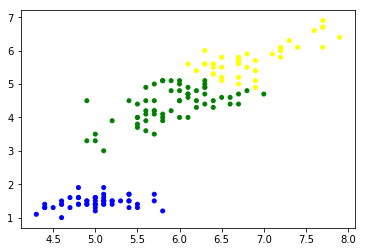

In [158]:
df_iris.loc[df_iris["Cluster"] == 0, "Color"] = "blue"
df_iris.loc[df_iris["Cluster"] == 1, "Color"] = "green"
df_iris.loc[df_iris["Cluster"] == 2, "Color"] = "yellow"
plt.scatter(x = df_iris["Sepal.Length"], y = df_iris["Petal.Length"], c = df_iris["Color"], s = 16)

Además nos interesa saber el centroide de cada cluster, pues es el "representante" de cada uno.

In [159]:
centroides = modelo.cluster_centers_
print(centroides)

[[5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]


Ahora agreguemos los centroides al data frame para que los podamos incluir en el gráfico.

In [160]:
df_temp = pd.DataFrame({  "Sepal.Length" : centroides[:, 0]
                        , "Sepal.Width"  : centroides[:, 1]
                        , "Petal.Length" : centroides[:, 2]
                        , "Petal.Width"  : centroides[:, 3]
                        , "Species"      : ["Centroide", "Centroide", "Centroide"]
                        , "Cluster"      : [1, 2, 3]
                        , "Color"        : ["red", "red", "red"]
                        }
                        )
print(df_temp)
df_iris_centroides = df_iris.append(df_temp, sort = True)
df_iris_centroides.info()

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width    Species  Cluster  \
0      5.006000     3.428000      1.462000     0.246000  Centroide        1   
1      5.901613     2.748387      4.393548     1.433871  Centroide        2   
2      6.850000     3.073684      5.742105     2.071053  Centroide        3   

  Color  
0   red  
1   red  
2   red  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 153 entries, 0 to 2
Data columns (total 7 columns):
Cluster         153 non-null int64
Color           153 non-null object
Petal.Length    153 non-null float64
Petal.Width     153 non-null float64
Sepal.Length    153 non-null float64
Sepal.Width     153 non-null float64
Species         153 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 9.6+ KB


Ahora volvamos a generar el gráfico, ahora con los centroides incluidos y pintados en rojo.

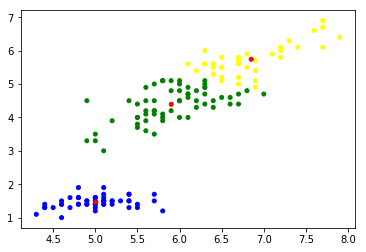

In [161]:
plt.scatter(  x = df_iris_centroides["Sepal.Length"]
            , y = df_iris_centroides["Petal.Length"]
            , c = df_iris_centroides["Color"]
            , s = 16
            )

Finalmente, pintamos las verdaderas especies con colores para que veamos que tan cercana está la clusterización con las especies. Es importante destacar que solamente podemos hacer esta comparación cuando conocemos la verdadera clasificación en nuestro conjunto de datos. En escendarios reales, la mayoría de las veces no es así.

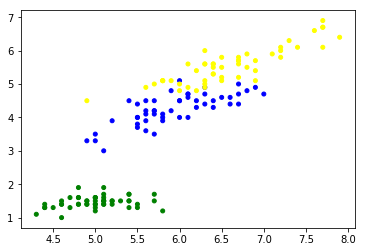

In [162]:
df_iris.loc[df_iris["Species"] == "setosa", "ColorSpecies"] = "green"
df_iris.loc[df_iris["Species"] == "versicolor", "ColorSpecies"] = "blue"
df_iris.loc[df_iris["Species"] == "virginica", "ColorSpecies"] = "yellow"
plt.scatter(x = df_iris["Sepal.Length"], y = df_iris["Petal.Length"], c = df_iris["ColorSpecies"], s = 16)

Observamos que el gráfico con especies se ve muy similar al de los clusters.

## Ejercicio

Se le entrega un conjunto de datos llamado **estudiantes.csv**. Consiste en información resumida por estudiante de Chile. Tiene las siguientes variables de trayectorias educativas:
- Repitencias
- Sobreedad
- Cambios Establecimiento
- Asistencia"             
- Notas
- Exclusion

Cárguelo en un data frame de Python y realice un análisis de clusterización con 4 clusters. Haga una caracterización verbal de los clusters obtenidos.

Puede descargar el archivo de datos de los siguientes enlaces:

https://drive.google.com/open?id=1OmvMtJ1qc340pCfCjfoZ_jQTxQalTzu8

https://1drv.ms/u/s!AryWb4aW7JhHzqAlYLqE8bZfTmw8nQ?e=N0uC1j
